# Term Project

### Steps we did
- import libraries
- load data
- restructure values
- try different models


In the process we came across different problems and then moved on with different approaches. Therefore it might be a little bit hard to understand what we went through. For situations like this we tried to comment everything we could.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [2]:
# LOAD DATA
df_data = pd.read_csv('data/train_features.csv')
df_targets = pd.read_csv('data/train_targets.csv')
df_test_data = pd.read_csv('data/test_features.csv')

In [3]:
# RESTRUCTURE DATA (to have only numeric values)
# X_train restructure
df_data['sex'] = df_data['sex'].map({'female': 0, 'male': 1})
df_data['smoker'] = df_data['smoker'].map({'no': 0, 'yes': 1})
df_data['region'] = df_data['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})
print(df_data)

# X_test restructure 
df_test_data['sex'] = df_test_data['sex'].map({'female': 0, 'male': 1})
df_test_data['smoker'] = df_test_data['smoker'].map({'no': 0, 'yes': 1})
df_test_data['region'] = df_test_data['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})

X = df_data
Y = df_targets
X_test = df_test_data

     age  sex     bmi  children  smoker  region
0     40    0  25.460         1       0       0
1     18    1  39.140         0       0       0
2     55    0  29.700         2       0       3
3     64    0  35.970         0       0       2
4     34    1  21.375         0       0       0
..   ...  ...     ...       ...     ...     ...
895   50    1  26.410         0       0       1
896   23    0  32.780         2       1       2
897   62    0  26.290         0       1       2
898   63    1  21.660         1       0       1
899   18    0  21.660         0       1       0

[900 rows x 6 columns]


## KNOW YOUR DATA

charges    13683.228793
dtype: float64


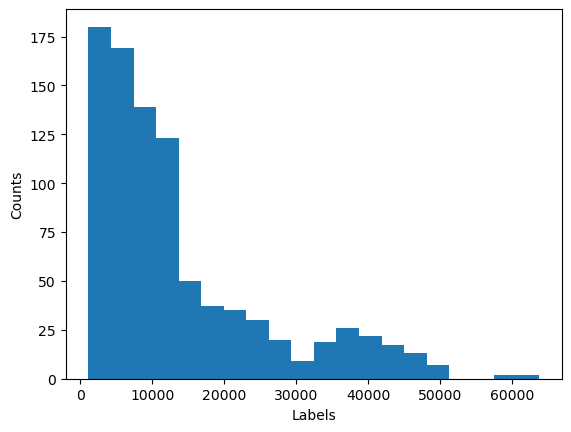

In [4]:
# SEE HOW LABELS ARE DISTRIBUTED
mean = df_targets.mean()
print(mean)

y = df_targets.values

plt.hist(y, bins=20, range=(y.min(), y.max()))
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.show()

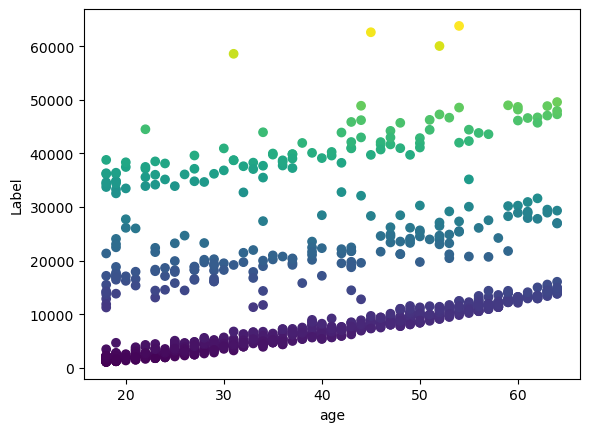

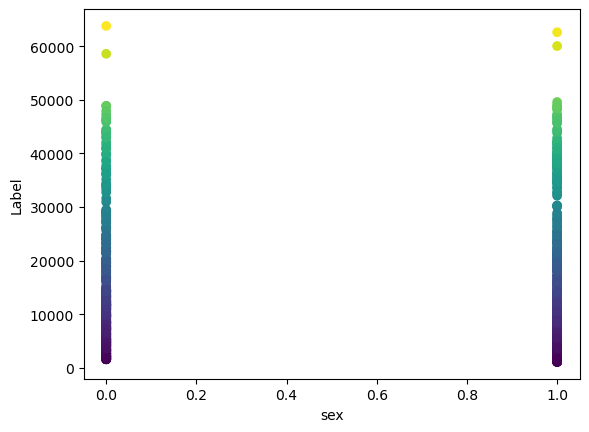

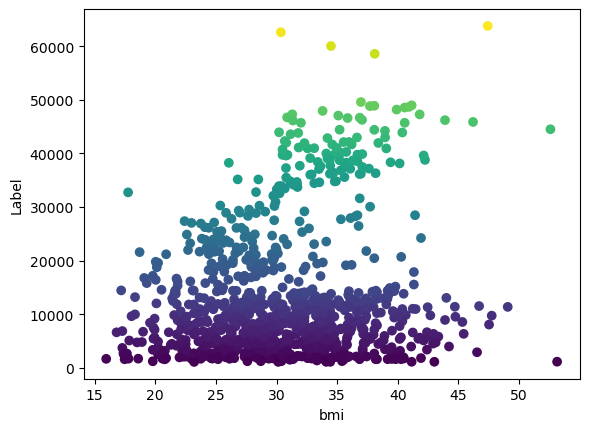

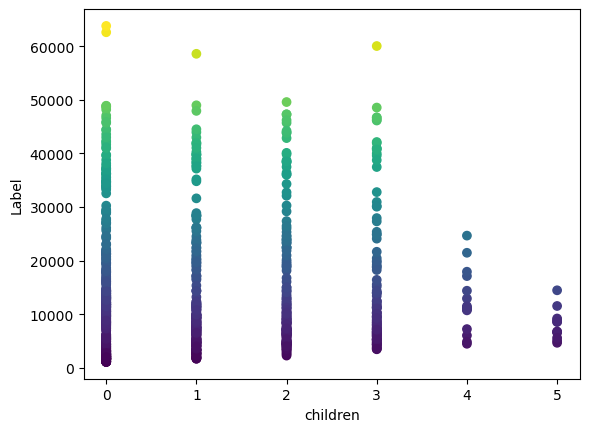

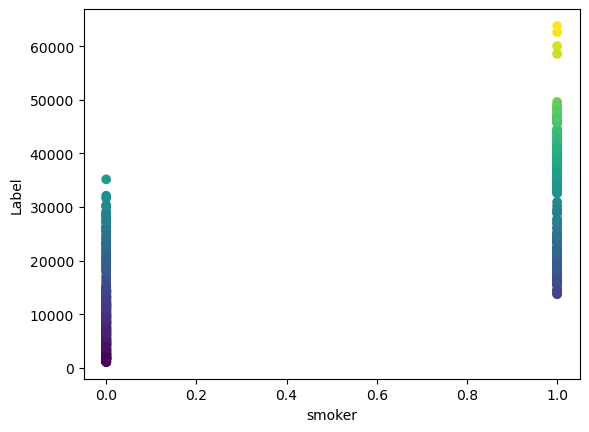

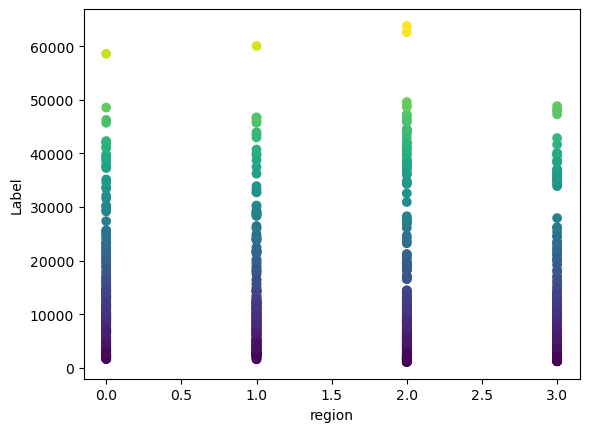

In [5]:
# SEE HOW FEATURE VALUES ARE DISTRIBUTED
feature_names = df_data.columns

for feature in feature_names:
  X = df_data[feature].values
  y = df_targets.values

  # Create a scatter plot
  plt.scatter(X, y, c=y, cmap='viridis')
  plt.xlabel(feature)
  plt.ylabel('Label')
  plt.show()

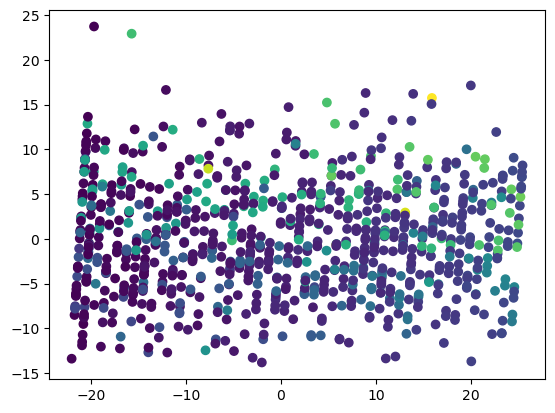

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_data.values
y = df_targets.values

# Perform PCA on the input dataset
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

# Plot the resulting dataset
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

# LINEAR REGRESSION MODEL 
model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X_test)

print(type(Y_pred))

df_predicted = pd.DataFrame(data=Y_pred, columns=['predicted'])
df_predicted.insert(0,'ID' ,df_predicted.index) 
print(df_predicted)
# df_predicted.to_csv('data/predicted.csv', index=False)


# we formed the csv file at the end of the whole jupyter notebook 

<class 'numpy.ndarray'>
      ID     predicted
0      0   4609.950752
1      1  11083.778632
2      2   6265.798985
3      3  34167.673148
4      4   8323.428323
..   ...           ...
433  433  30994.064025
434  434  14715.356669
435  435   9783.418204
436  436   9322.346228
437  437   9672.876884

[438 rows x 2 columns]


## 5-FOLD CV

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [9]:
# REGRESSOR FUNCTION
def fit_to_the_model(df_data, df_targets, model_type:str):
    mse_list = []
    for i in range(5):
        X_train, X_val, y_train, y_val = train_test_split(df_data, df_targets, test_size=0.2)
    
        # SELECT MODEL WITH INPUT
        if model_type == 'linear':
            model = LinearRegression()
        elif model_type == 'random_forest':
            model = RandomForestRegressor()
        elif model_type == 'decision_tree':
            model = DecisionTreeRegressor()
        else:
            raise ValueError('Invalid model_type')

        
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
    
        mse = mean_squared_error(y_val, y_pred)
        mse_list.append(mse)
        #print(i,". iteration mse= ", mse)

    mean_mse = sum(mse_list) / len(mse_list)
    print(model_type,"->" ,"Mean MSE:", mean_mse)


    df_predictions = pd.DataFrame( y_pred, columns = ['predictions'])
    return df_predictions # returns pandas dataframe

In [10]:
fit_to_the_model(df_data, df_targets, 'linear')
fit_to_the_model(df_data, df_targets, 'decision_tree')
fit_to_the_model(df_data, df_targets, 'random_forest')

linear -> Mean MSE: 39719864.34094529
decision_tree -> Mean MSE: 51226670.74837699
random_forest -> Mean MSE: 26660579.057152286


,predictions
0,28805.888714
1,40233.295572
2,14445.249651
3,26347.884782
4,10362.018436
...,...
175,12245.695589
176,2136.143042
177,6622.739284
178,42569.546197


In [11]:
# since random forest model has the smallest error rate
# we used it to form predictions.csv


# form csv using Random Forest Regressor
model = RandomForestRegressor()
model.fit(df_data, df_targets)

predictions = model.predict(X_test)

print(type(predictions))

df_predicted = pd.DataFrame(data=predictions, columns=['predicted'])
df_predicted.insert(0,'ID' ,df_predicted.index) 
print(df_predicted)
#df_predicted.to_csv('data/predicted.csv', index=False)

<class 'numpy.ndarray'>
      ID     predicted
0      0   5557.625834
1      1  16736.407892
2      2  11125.785524
3      3  40479.153809
4      4   7243.936994
..   ...           ...
433  433  37108.802445
434  434  13647.385345
435  435   6854.079872
436  436   9082.337544
437  437   5818.671687

[438 rows x 2 columns]


In [17]:
# since we experienced getting different mse values everytime with random forest approach,
# we decided to iterate many times and find the best model possible
# this function uses random forest and 5-fold cross validation to find best model possible
# we can iterate as much as we want with changing the k variable

def random_forest_regressor_with_kfold_cv(df_data, df_targets, df_test_data, k):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    
    best_model = None
    best_mse = np.inf
    
    for i in range(k):
        
        # print progress (1000 iterations may take a long time)
        if i % (k // 10) == 0 and i != 0:
            print("Function is ",i / k * 100 ,"% completed")
            
        mse_values = []

        for train_index, val_index in kfold.split(df_data):

            X_train, X_val = df_data.iloc[train_index], df_data.iloc[val_index]
            y_train, y_val = df_targets.iloc[train_index], df_targets.iloc[val_index]
            

            model = RandomForestRegressor()
            model.fit(X_train, y_train)
            

            y_pred = model.predict(X_val)
            mse = mean_squared_error(y_val, y_pred)
            #print(mse)
            mse_values.append(mse)
        
        mean_mse = np.mean(mse_values)
        #print("mean mse: ", mean_mse)
        if mean_mse < best_mse:
            best_model = model
            best_mse = mean_mse
    

    return best_model

In [19]:
best_model = random_forest_regressor_with_kfold_cv(df_data, df_targets, df_test_data, 1000)
# 1000 iterations took us almost 20 minutes! 
# each iteration has 5-fold cv itself so at least 5 * 1000 data model is created
# so if you are going to try the function we suggest something like k = 20

# finally use the best random forest model
best_model.fit(df_data, df_targets)
predictions = model.predict(X_test)

#print(type(predictions))

df_predicted = pd.DataFrame(data=predictions, columns=['predicted'])
df_predicted.insert(0,'ID' ,df_predicted.index) 
print(df_predicted)

# write final result to the csv file
df_predicted.to_csv('data/predicted.csv', index=False)

Function is  10.0 % completed
Function is  20.0 % completed
Function is  30.0 % completed
Function is  40.0 % completed
Function is  50.0 % completed
Function is  60.0 % completed
Function is  70.0 % completed
Function is  80.0 % completed
Function is  90.0 % completed
      ID     predicted
0      0   5557.625834
1      1  16736.407892
2      2  11125.785524
3      3  40479.153809
4      4   7243.936994
..   ...           ...
433  433  37108.802445
434  434  13647.385345
435  435   6854.079872
436  436   9082.337544
437  437   5818.671687

[438 rows x 2 columns]
